# Importamos las librerías necesarias.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import numpy.polynomial.polynomial as poly
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Cargamos los datos.

In [2]:
df = pd.read_csv('problem1.csv')
df

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611
...,...,...,...,...
129,1.87,4.925350,NaN,NaN
130,1.90,5.064481,NaN,NaN
131,1.93,5.154600,NaN,NaN
132,1.96,5.442464,NaN,NaN


In [3]:
x = df['X_training']
y = df['Y_training']
x_test = df['X_test']
y_test = df['Y_test']

# Visualizamos los datos.

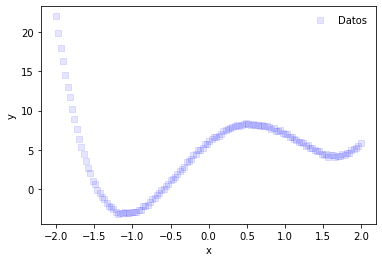

In [4]:
plt.plot(x, y, 'bs', alpha=0.1, label='Datos')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Hacemos un primer ajuste a nuestros datos con un polinomio de grado 9.

In [5]:
coef = poly.polyfit(x, y, 9,rcond=None,w=None) 
coef

array([ 6.00783252e+00,  8.01668632e+00, -6.06204773e+00, -2.94765170e+00,
        2.09313341e+00, -6.68155496e-02, -4.20157749e-02,  2.53738852e-02,
        5.59556767e-03, -3.10136798e-03])

# Visualización para los datos de aprendizaje.

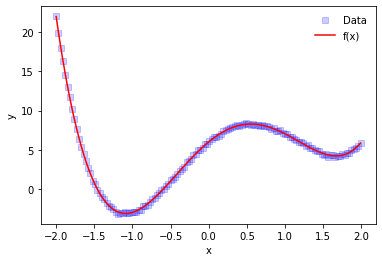

In [6]:
model = poly.Polynomial(coef)
model

plt.plot(x, y,'bs',alpha=0.2, label='Data')
plt.plot(x, model(x),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Visualización para los datos de testeo.

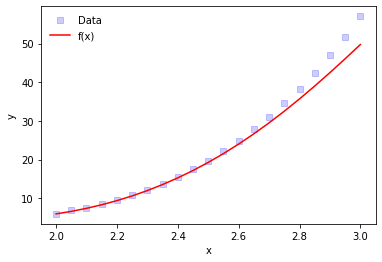

In [7]:
plt.plot(x_test, y_test,'bs',alpha=0.2, label='Data')
plt.plot(x_test, model(x_test),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Buscamos el grado óptimo del polinomio usando el criterio AIC.

In [8]:
Pol_Max = 10 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [9]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


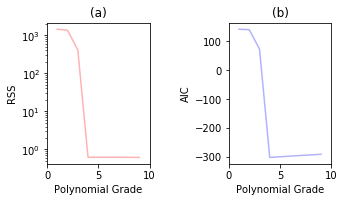

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

In [11]:
grade = np.argmin(AICv)+1
grade

4

# Hacemos el nuevo ajuste de datos con el grado del polinomio óptimo obtenido.

In [12]:
coef2 = poly.polyfit(x, y, grade)

In [13]:
model2 = poly.Polynomial(coef2)
model2

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

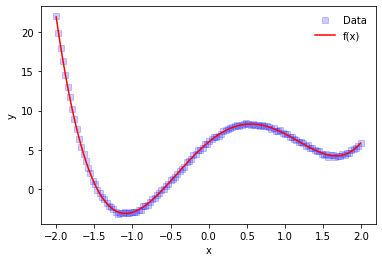

In [14]:
plt.plot(x, y,'bs',alpha=0.2, label='Data')
plt.plot(x, model2(x),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

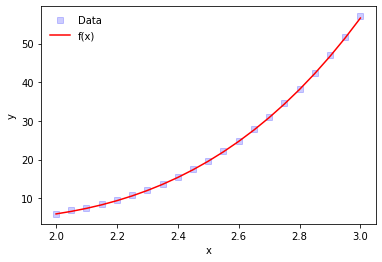

In [15]:
plt.plot(x_test, y_test,'bs',alpha=0.2, label='Data')
plt.plot(x_test, model2(x_test),'r', label='f(x)')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Fin del código.